# MedRAG: Medical Research Answer Graph

Graph RAG (MedRAG). This technique improves LLM performance in the medical domain by response queries with grounded source citations and clear interpretations of medical terminology, boosting the transparency and interpretability of the results. This approach involves a three-tier hierarchical graph construction method. Initially, we use documents provided by users as our top-level source to extract entities. These entities are then linked to a second level consisting of more basic entities previously abstracted from credible medical books and papers.

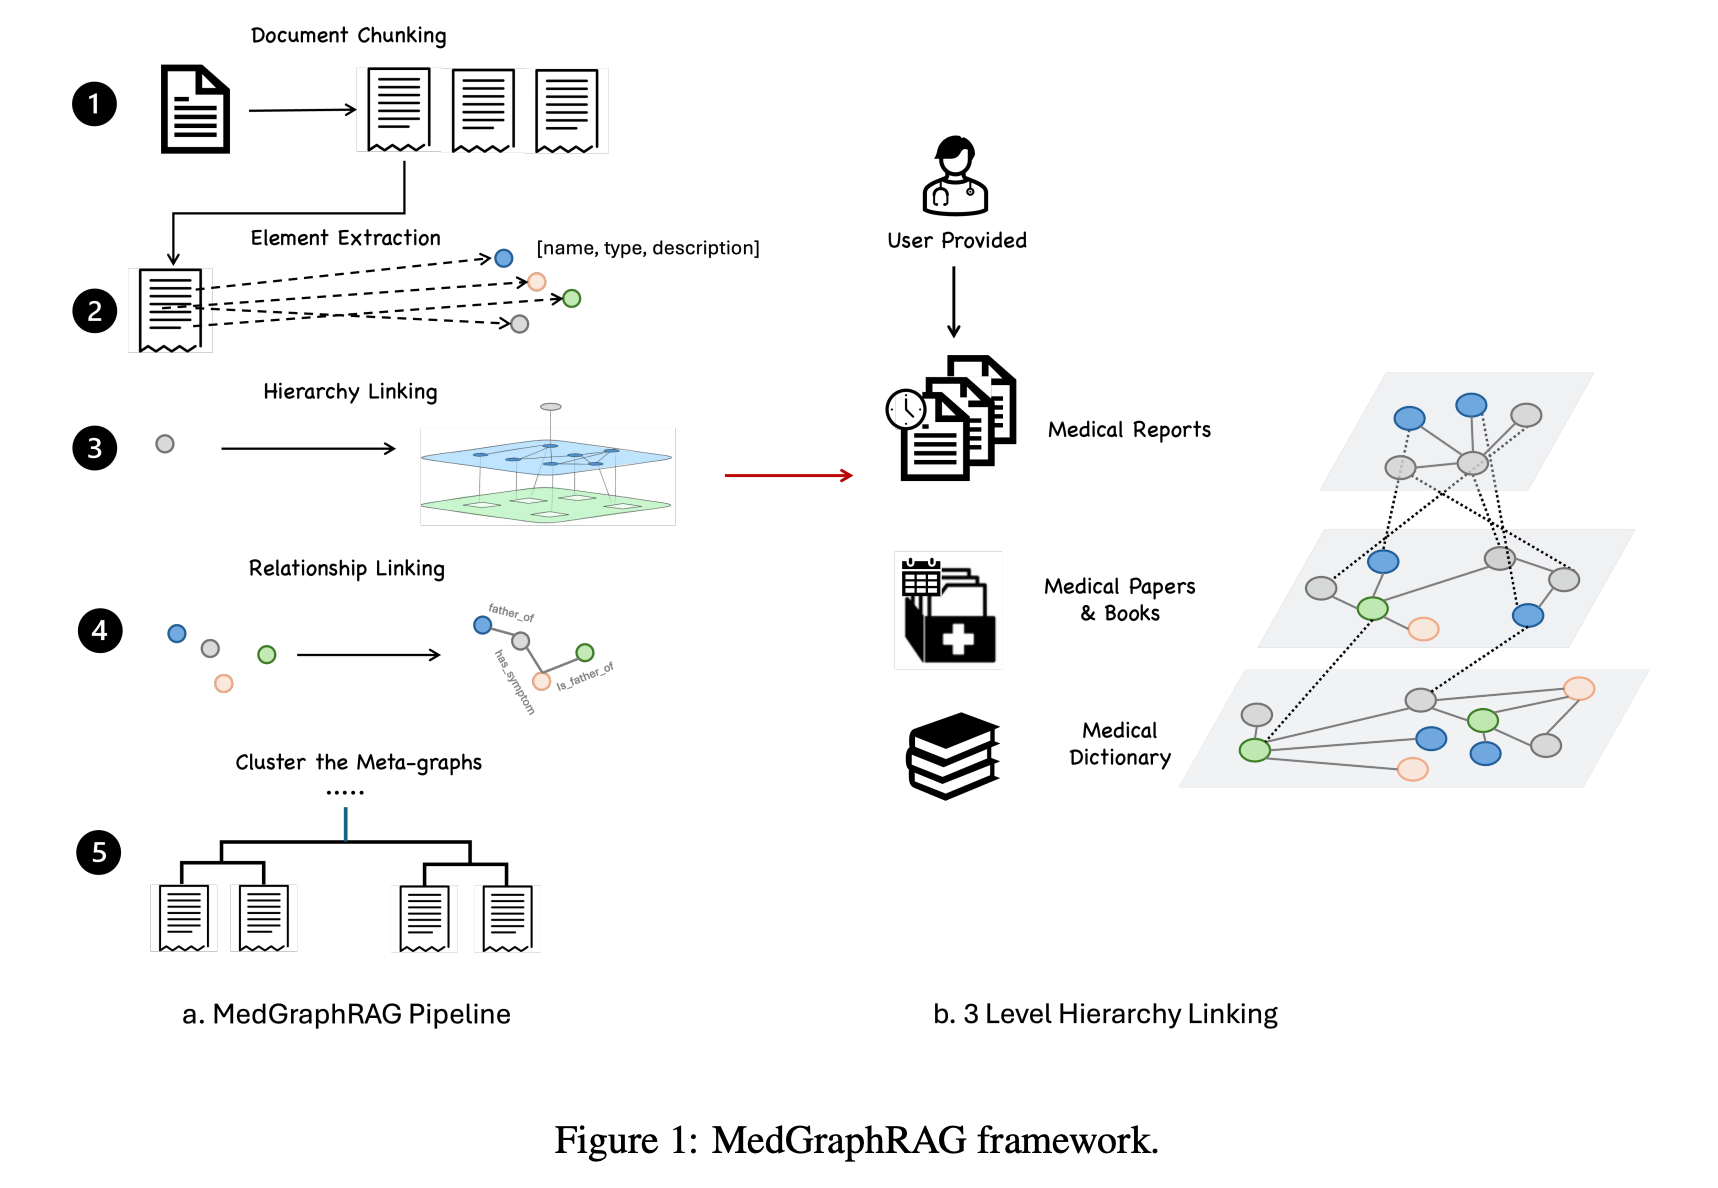

Ref: https://arxiv.org/html/2408.04187

In [5]:
from llama_index.core import VectorStoreIndex
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.node_parser import (
    SentenceSplitter,
    SemanticSplitterNodeParser,
    SemanticDoubleMergingSplitterNodeParser,
    LanguageConfig,
)
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.llms.openai import OpenAI

from llama_index.core import SimpleDirectoryReader
import os
from dotenv import load_dotenv

load_dotenv()  # take environment variables from .env.
os.environ["OPENAI_API_KEY"] = os.getenv('OPENAI_API_KEY')

In [15]:
from llama_index.core import SimpleDirectoryReader

# load documents
documents = SimpleDirectoryReader(input_files=["spec.txt"]).load_data()

In [16]:
embed_model = OpenAIEmbedding()
llm = OpenAI(model="gpt-4o-mini")

In [9]:
!pip install llama-index-node-parser-topic

In [17]:
from llama_index.node_parser.topic import TopicNodeParser

In [19]:
node_parser = TopicNodeParser.from_defaults(
    llm=llm,
    max_chunk_size=1000,
    similarity_method="llm",  # can be "llm" or "embedding"
    window_size=5,  # paper suggests window_size=5
)

# also baseline splitter
base_splitter = SentenceSplitter(chunk_size=512)

In [20]:
nodes = node_parser.get_nodes_from_documents(documents, show_progress=True)

Parsing nodes: 100%|██████████| 1/1 [09:14<00:00, 554.86s/it]


In [21]:
print(nodes[0].get_content())

Tuổi Bính Thìn - 1976 được đánh giá là tốt. Tuổi Đinh Hợi - 1947 được đánh giá là tốt. Tuổi Nhâm Tý - 1972 được đánh giá là tốt. Tuổi Quý Mùi - 2003 được đánh giá là tốt. Tuổi Nhâm Ngọ - 2002 được đánh giá là tốt. Tuổi Canh Tý - 1960 được đánh giá là tốt. Tuổi Nhâm Ngọ - 1942 được đánh giá là tốt. Tuổi Quý Mùi - 1943 được đánh giá là tốt. Tuổi Tân Mão - 1951 được đánh giá là tốt. Tuổi Kỷ Mão - 1939 được đánh giá là tốt.


In [22]:
print("Number of nodes:", len(nodes))

Number of nodes: 181


In [28]:
print('node 3:', nodes[7].get_content())

node 3: Địa chi tuổi xông nhà là Thìn đạt Tam Hợp với địa chi Thìn của năm Giáp Thìn. Địa chi tuổi xông nhà là Thìn đạt Tam Hợp với địa chi Thìn của năm Giáp Thìn được đánh giá là rất tốt.
